# Open this notebook in colab
#<a href="https://colab.research.google.com/github/da-roth/NeuronalNetworkTensorflowFramework/blob/main/src/Examples_Colab/CumulativeDensitiyFunction/ImplementationTogether.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
%%capture
pip install git+https://github.com/da-roth/NeuronalNetworkTensorflowFramework#montecarlolearning

GPU support =  False
RMSE after 100 training steps is [0.50161587]
RMSE after 200 training steps is [0.62156657]
RMSE after 300 training steps is [0.33020373]
RMSE after 400 training steps is [0.64947705]
RMSE after 500 training steps is [0.41549937]
RMSE after 600 training steps is [0.11741655]
RMSE after 700 training steps is [0.20911739]
RMSE after 800 training steps is [0.47038353]
RMSE after 900 training steps is [0.57314054]
RMSE after 1000 training steps is [0.40285267]
RMSE after training is [0.40285267]
max error  after training is [0.45274216]


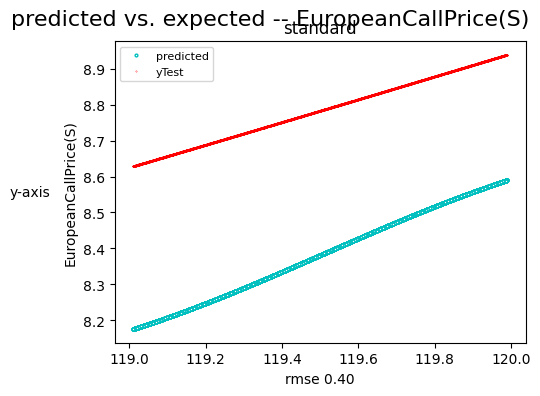

In [16]:
###
### 0. Import packages and references
###
### - dataSeed = seed for simulations or (for csv input) for randomization of csv

from montecarlolearning import *

###
### 1. Training data
###
#from CDF import *
Generator = Multilevel_GBM(Multilevel_Train_Case.Euler, 4 ,Multilevel_Train_Dimension.one, False)
Generator.set_inputName('S')
Generator.set_outputName('EuropeanCallPrice(S)')

###
### 2. Set Nueral network structure / 
# Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(20)
Regressor.set_hiddenLayers(2)
Regressor.set_activationFunctionsHidden(tf.nn.sigmoid)
Regressor.set_activationFunctionOutput(tf.nn.sigmoid)
Regressor.set_weight_seed(1)

TrainSettings = TrainingSettings()
TrainSettings.useExponentialDecay(0.01, 0.1, 1000)
TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(100)
TrainSettings.set_nTest(10000)
TrainSettings.set_samplesPerStep(10000)
TrainSettings.set_trainingSteps(1000)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###

xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("predicted vs. expected", yPredicted, xTest, yTest, Generator)

RMSE after 500 training steps is [4.04527667]
RMSE after 1000 training steps is [3.83201964]
RMSE after training is [3.83201964]
max error  after training is [3.93905089]
RMSE after 500 training steps is [7.22549956]
RMSE after 1000 training steps is [7.20618958]
RMSE after training is [7.20618958]
max error  after training is [7.35058837]
RMSE after 500 training steps is [7.75668322]
RMSE after 1000 training steps is [7.76565564]
RMSE after training is [7.76565564]
max error  after training is [7.91567678]
RMSE after 500 training steps is [8.18389931]
RMSE after 1000 training steps is [8.16656833]
RMSE after training is [8.16656833]
max error  after training is [8.31627427]
RMSE after 500 training steps is [8.45102452]
RMSE after 1000 training steps is [8.4457175]
RMSE after training is [8.4457175]
max error  after training is [8.59880143]


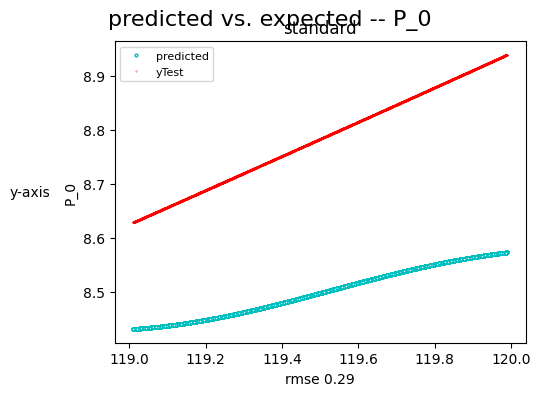

In [17]:
###
### 1. Training data
###
#from CDF import *
Generator = Multilevel_GBM(Multilevel_Train_Case.Milstein, 0, Multilevel_Train_Dimension.one)
Generator.set_inputName('S')
Generator.set_outputName('P_0')

GeneratorLevel1 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 0, Multilevel_Train_Dimension.one)
GeneratorLevel1 .set_inputName('x')
GeneratorLevel1 .set_outputName('P_1-P_0')

GeneratorLevel2 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 1, Multilevel_Train_Dimension.one)
GeneratorLevel2 .set_inputName('x')
GeneratorLevel2 .set_outputName('P_2-P_1')

GeneratorLevel3 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 2, Multilevel_Train_Dimension.one)
GeneratorLevel3 .set_inputName('x')
GeneratorLevel3 .set_outputName('P_3-P_2')

GeneratorLevel4 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 3, Multilevel_Train_Dimension.one)
GeneratorLevel4 .set_inputName('x')
GeneratorLevel4 .set_outputName('P_4-P_3')


###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(20)
Regressor.set_hiddenLayers(2)
Regressor.set_activationFunctionsHidden(tf.nn.sigmoid)
Regressor.set_activationFunctionOutput(tf.nn.sigmoid)
Regressor.set_weight_seed(1)

TrainSettings = TrainingSettings()
TrainSettings.useExponentialDecay(0.01, 0.1, 1000)
TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(500)
TrainSettings.set_nTest(10000)
TrainSettings.set_samplesPerStep(10000)
TrainSettings.set_trainingSteps(1000)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###

xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
TrainSettings.set_samplesPerStep(10000)
xTest2, yTest2, yPredictedLevel1 = train_and_test(GeneratorLevel1, Regressor, TrainSettings)
TrainSettings.set_samplesPerStep(25000)
xTest, yTest, yPredictedLevel2 = train_and_test(GeneratorLevel2, Regressor, TrainSettings)
TrainSettings.set_samplesPerStep(10000)
xTest, yTest, yPredictedLevel3 = train_and_test(GeneratorLevel3, Regressor, TrainSettings)
xTest, yTest, yPredictedLevel4 = train_and_test(GeneratorLevel4, Regressor, TrainSettings)
multilevel_predicted = {('standard', 10000): np.add(yPredicted[('standard', 10000)], yPredictedLevel1[('standard', 10000)])}
multilevel_predicted = {('standard', 10000): np.add(multilevel_predicted[('standard', 10000)], yPredictedLevel2[('standard', 10000)])}
multilevel_predicted = {('standard', 10000): np.add(multilevel_predicted[('standard', 10000)], yPredictedLevel3[('standard', 10000)])}
multilevel_predicted = {('standard', 10000): np.add(multilevel_predicted[('standard', 10000)], yPredictedLevel4[('standard', 10000)])}
plot_results("predicted vs. expected", multilevel_predicted, xTest, yTest, Generator)